# Imports

In [14]:
import gym_pm
from gym_pm.utils import load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from timeseries_generator.external_factors import CountryGdpFactor, EUIndustryProductFactor
from timeseries_generator import LinearTrend, Generator, HolidayFactor, RandomFeatureFactor, SinusoidalFactor, WeekdayFactor, WhiteNoise

# Generate Data

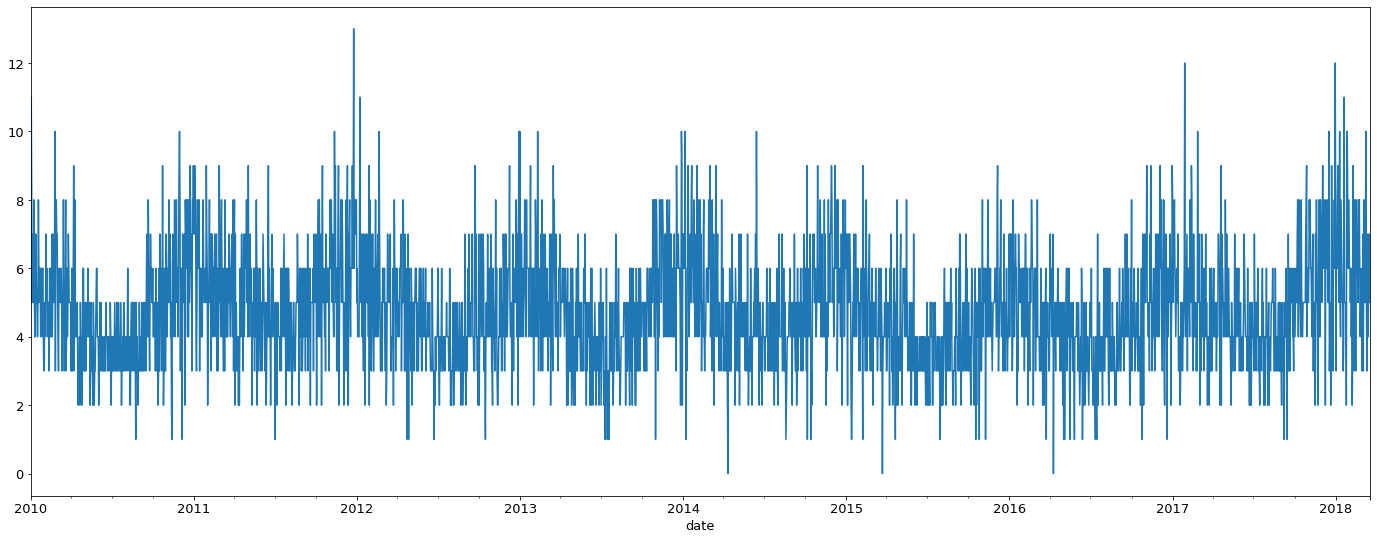

In [17]:
df = Generator(factors = {CountryGdpFactor(),
                          EUIndustryProductFactor(),
                          HolidayFactor(holiday_factor = 1.5),
                          WeekdayFactor(
                              factor_values = {4: 1.05, 5: 1.15, 6: 1.15}  
                          ), # Here we assign a factor of 1.05 to Friday, and 1.15 to Sat/Sun
                          SinusoidalFactor(wavelength = 365, 
                                           amplitude = 0.2, 
                                           phase = 365/4, 
                                           mean = 1),
                          WhiteNoise(stdev_factor = 0.3)},
               features = {"country": ["Netherlands"],
                           "store": ["store1"],
                           "product": ["winter jacket"]},
               date_range = pd.date_range(start = '2010', periods = 3000, freq = 'D'),
               base_value = 4).generate()

df[df.value < 0] = 0
df.value = round(df.value)
df.set_index('date').value.plot(figsize = (24, 9))
plt.rcParams.update({'font.size': 13})
plt.show()

In [16]:
print(df.value.mean())
print(df.value.std())

df

4.72
1.6808356263480926


,date,country,store,product,base_amount,weekend_trend_factor,country_gdp_factor,eu_industry_product_factor,sinusoidal_factor,white_noise,holiday_trend_factor,total_factor,value
0,2010-01-01 00:00:00,Netherlands,store1,winter jacket,4,1.05,1.128478,0.931,1.200000,1.110147,1.500000,2.204372,9.0
1,2010-01-02 00:00:00,Netherlands,store1,winter jacket,4,1.15,1.128478,0.931,1.199970,0.803838,1.365529,1.591404,6.0
2,2010-01-03 00:00:00,Netherlands,store1,winter jacket,4,1.15,1.128478,0.931,1.199881,0.484172,1.303741,0.915102,4.0
3,2010-01-04 00:00:00,Netherlands,store1,winter jacket,4,1.00,1.128478,0.931,1.199733,0.969061,1.250196,1.527061,6.0
4,2010-01-05 00:00:00,Netherlands,store1,winter jacket,4,1.00,1.128478,0.931,1.199526,0.907720,1.195589,1.367685,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2018-03-15 00:00:00,Netherlands,store1,winter jacket,4,1.00,1.173723,1.052,1.055219,0.996148,1.000000,1.297920,5.0
2996,2018-03-16 00:00:00,Netherlands,store1,winter jacket,4,1.05,1.173723,1.052,1.051902,0.830438,1.000000,1.132539,5.0
2997,2018-03-17 00:00:00,Netherlands,store1,winter jacket,4,1.15,1.173723,1.052,1.048570,0.660604,1.000000,0.983598,4.0
2998,2018-03-18 00:00:00,Netherlands,store1,winter jacket,4,1.15,1.173723,1.052,1.045223,1.125126,1.000000,1.669896,7.0
